## Данные об игроках NBA 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
nba_data = pd.read_csv("nba_2013.csv")
nba_data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [66]:
nba_data.pos.unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

Описание признаков - по [ссылке](https://www.basketball-reference.com/about/glossary.html).    
  
Для кластеризации оставим только числовые признаки.

In [67]:
num_columns = ['age','g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
               'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf','pts']
nba = nba_data[num_columns] 

In [68]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,461.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,0.160166,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,0.654000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,0.751000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,0.821000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000


## Задания




### Обработайте пропущенные значения

In [14]:
nba.isna().sum()

age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      2
x3p      0
x3pa     0
x3p.    67
x2p      0
x2pa     0
x2p.     3
efg.     2
ft       0
fta      0
ft.     20
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
pts      0
dtype: int64

In [15]:
nba[nba['fga'] == 0]

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
90,30,4,0,24,0,0,NaN,0,0,NaN,...,NaN,0,3,3,2,1,0,1,1,0
397,26,2,0,2,0,0,NaN,0,0,NaN,...,NaN,0,0,0,0,0,0,0,0,0


In [16]:
nba.fillna(0, inplace=True)
nba.isna().sum()

age     0
g       0
gs      0
mp      0
fg      0
fga     0
fg.     0
x3p     0
x3pa    0
x3p.    0
x2p     0
x2pa    0
x2p.    0
efg.    0
ft      0
fta     0
ft.     0
orb     0
drb     0
trb     0
ast     0
stl     0
blk     0
tov     0
pf      0
pts     0
dtype: int64

### Проверьте, нужна ли стандартизация данных в данном случае. Если нужно, стандартизируйте данные. 

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
minmax = MinMaxScaler()
nba_transformed = minmax.fit_transform(nba)
nba_transformed

array([[0.2       , 0.75609756, 0.        , ..., 0.10169492, 0.44688645,
        0.06594678],
       [0.05      , 0.97560976, 0.24390244, ..., 0.24067797, 0.74358974,
        0.10219823],
       [0.4       , 0.63414634, 0.14634146, ..., 0.13220339, 0.3956044 ,
        0.13960663],
       ...,
       [0.3       , 0.95121951, 0.95121951, ..., 0.55932203, 0.78021978,
        0.54647127],
       [0.1       , 0.98780488, 0.03658537, ..., 0.29491525, 0.62271062,
        0.1889703 ],
       [0.25      , 0.84146341, 0.1097561 , ..., 0.20338983, 0.5018315 ,
        0.15387582]])

In [19]:
nba_scaled = pd.DataFrame(nba_transformed, columns=nba.columns)
nba_scaled

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,0.20,0.756098,0.000000,0.271067,0.077739,0.083531,0.468,0.015326,0.024390,0.266667,...,0.660,0.163636,0.183908,0.193896,0.038835,0.120419,0.118721,0.101695,0.446886,0.065947
1,0.05,0.975610,0.243902,0.383211,0.109541,0.109597,0.503,0.000000,0.000000,0.000000,...,0.581,0.322727,0.242656,0.298025,0.059639,0.209424,0.260274,0.240678,0.743590,0.102198
2,0.40,0.634146,0.146341,0.307594,0.168433,0.162915,0.520,0.000000,0.000000,0.000000,...,0.639,0.231818,0.260536,0.274686,0.052705,0.125654,0.164384,0.132203,0.395604,0.139607
3,0.45,0.878049,0.890244,0.817366,0.546525,0.598934,0.459,0.490421,0.487805,0.426667,...,0.815,0.072727,0.293742,0.235189,0.343967,0.183246,0.013699,0.494915,0.498168,0.512919
4,0.30,0.670732,0.365854,0.304390,0.160188,0.147512,0.546,0.000000,0.001626,0.000000,...,0.836,0.213636,0.233716,0.248654,0.055479,0.120419,0.210046,0.213559,0.684982,0.126494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0.05,0.865854,0.195122,0.565203,0.406360,0.478673,0.427,0.153257,0.305691,0.212766,...,0.641,0.156818,0.203065,0.204668,0.300971,0.408377,0.073059,0.691525,0.553114,0.362129
477,0.45,0.768293,0.109756,0.579622,0.455830,0.526659,0.435,0.517241,0.569106,0.385714,...,0.825,0.065909,0.174968,0.149013,0.131761,0.240838,0.054795,0.322034,0.571429,0.441188
478,0.30,0.951220,0.951220,0.870554,0.685512,0.760071,0.454,0.344828,0.474797,0.308219,...,0.712,0.377273,0.395913,0.427289,0.252427,0.874346,0.164384,0.559322,0.780220,0.546471
479,0.10,0.987805,0.036585,0.453380,0.202591,0.239336,0.426,0.000000,0.001626,0.000000,...,0.730,0.268182,0.300128,0.316876,0.127601,0.209424,0.187215,0.294915,0.622711,0.188970


### Выполните иерархическую кластеризацию  
  
Попробуйте различные расстояния между объектами и кластерами.  
Сравните разбиения, полученные разными способами (consensus measures etc.) 

In [20]:
import scipy.cluster.hierarchy as h

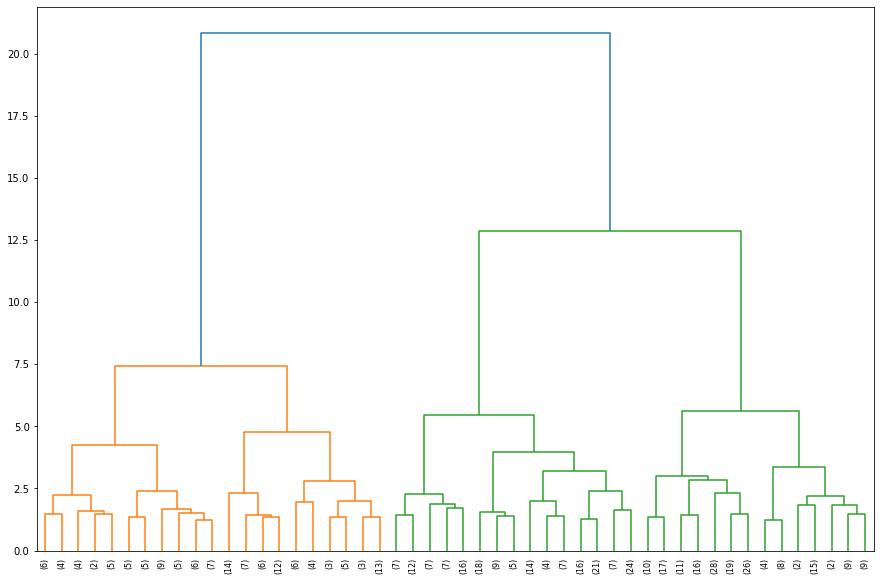

In [55]:
Z = h.linkage(nba_scaled, method='ward', metric='euclidean')
labels_h = h.fcluster(Z, t=8, criterion='maxclust')
plt.figure(figsize=(15, 10))
_=h.dendrogram(Z, p=50, truncate_mode='lastp')

In [56]:
labels_h

array([6, 6, 6, 3, 6, 7, 1, 6, 6, 6, 2, 8, 6, 6, 3, 6, 5, 4, 8, 6, 3, 8,
       6, 6, 5, 7, 6, 8, 7, 7, 5, 6, 5, 6, 7, 2, 6, 4, 5, 7, 6, 3, 6, 5,
       7, 6, 8, 7, 6, 6, 6, 5, 5, 8, 7, 2, 7, 2, 1, 4, 5, 6, 3, 8, 5, 7,
       7, 7, 7, 7, 7, 5, 5, 6, 3, 7, 7, 7, 6, 6, 3, 6, 7, 3, 5, 4, 6, 3,
       2, 3, 8, 7, 6, 7, 7, 5, 7, 5, 6, 4, 7, 1, 8, 7, 5, 5, 6, 6, 7, 8,
       4, 2, 8, 7, 7, 1, 6, 2, 7, 7, 7, 6, 2, 4, 5, 6, 6, 6, 4, 1, 6, 2,
       3, 4, 8, 7, 4, 8, 6, 6, 5, 1, 6, 7, 1, 7, 3, 7, 6, 5, 3, 7, 7, 7,
       3, 6, 6, 6, 2, 2, 4, 6, 4, 2, 5, 7, 8, 7, 7, 7, 5, 1, 6, 7, 6, 5,
       3, 3, 6, 1, 7, 6, 7, 6, 5, 4, 5, 7, 7, 6, 8, 7, 7, 2, 7, 4, 7, 4,
       2, 6, 2, 1, 2, 2, 3, 2, 7, 3, 6, 7, 8, 6, 1, 7, 2, 1, 6, 2, 4, 8,
       5, 5, 8, 8, 7, 4, 8, 7, 7, 1, 3, 7, 4, 6, 2, 7, 6, 3, 7, 3, 8, 7,
       7, 8, 2, 1, 6, 6, 2, 7, 6, 2, 7, 4, 3, 6, 8, 8, 7, 5, 7, 7, 4, 7,
       5, 1, 7, 2, 7, 6, 6, 8, 4, 5, 2, 7, 1, 4, 4, 7, 5, 6, 3, 6, 6, 7,
       3, 7, 3, 7, 7, 6, 6, 6, 7, 7, 3, 3, 3, 7, 3,

### Выполните кластеризацию методом Dbscan  
  
Подберите подходящие значения параметров.  
Подходит ли dbscan для кластеризации этих данных?

In [32]:
from sklearn.cluster import DBSCAN

In [43]:
dbscan = DBSCAN(
    eps=0.4,
    min_samples=5
)
labels_dbscan = dbscan.fit_predict(nba_scaled)
labels_dbscan

array([ 0, -1,  0, -1,  0,  0, -1,  0, -1, -1, -1,  0, -1,  0,  1,  0, -1,
       -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0, -1, -1,  5,
        0, -1, -1, -1,  0,  0,  0,  4,  0,  0,  0,  5, -1,  0, -1,  0, -1,
       -1, -1,  0, -1, -1,  0,  0, -1, -1, -1, -1, -1,  2,  0,  0,  0,  0,
        0,  0,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0, -1, -1,  0, -1, -1,
       -1,  0, -1,  0,  1,  3,  0,  0,  0,  0,  0,  0,  0, -1,  4,  0, -1,
        2,  0, -1,  0,  0,  0,  0, -1, -1, -1,  2,  0,  0, -1,  0, -1,  0,
        0,  0,  0, -1, -1, -1, -1,  0,  0, -1, -1,  0, -1, -1, -1,  2,  0,
       -1,  2,  0,  0, -1, -1,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,
        0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0,  2,  0,  0,  0,
       -1, -1,  0,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  3,  0,  0, -1,  0, -1,  0,  4, -1,  0, -1, -1, -1, -1,
        1,  0,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  5,  4,  3,  0,
       -1,  0,  0,  0, -1

DBSCAN не подходит для кластеризации этих данных

In [44]:
import seaborn as sns

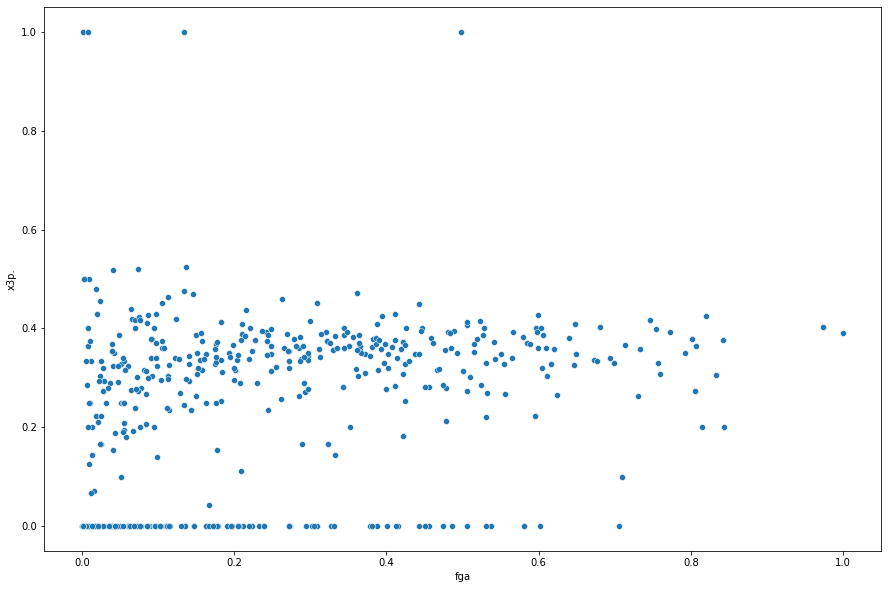

In [46]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='fga', y='x3p.', data=nba_scaled)
plt.show()

### Выполните кластеризацию алгоритмом Kmeans  
  
Подберите "оптимальное" число кластеров.

In [47]:
from sklearn.cluster import KMeans

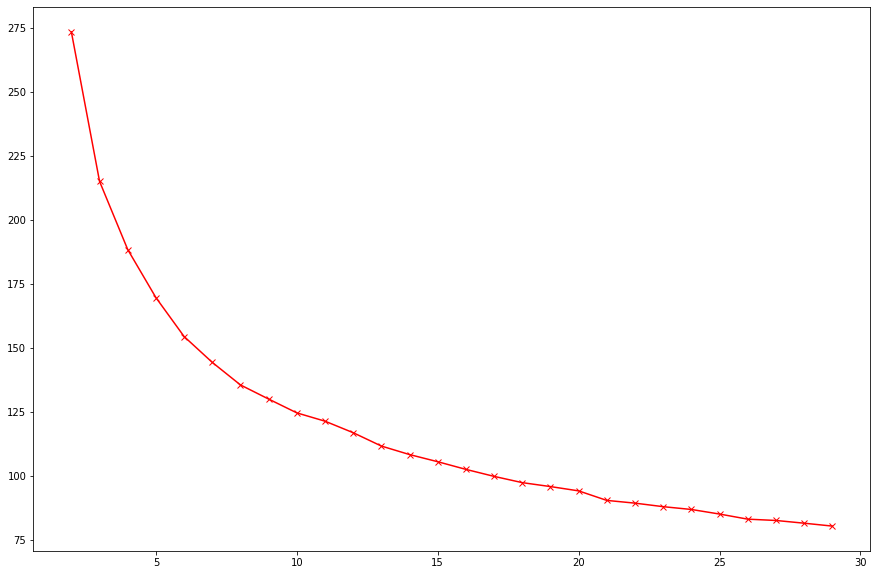

In [50]:
plt.figure(figsize=(15, 10))
inertia = []
for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(nba_scaled)
    labels_km = kmeans.predict(nba_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(2, 30), inertia, 'x-r')
plt.show()

In [51]:
kmeans = KMeans(n_clusters=8, n_init=10)
kmeans.fit(nba_scaled)
labels_km = kmeans.predict(nba_scaled)

In [52]:
labels_km

array([6, 1, 1, 5, 1, 2, 4, 1, 0, 1, 5, 7, 1, 0, 5, 6, 0, 3, 2, 6, 5, 2,
       1, 1, 0, 2, 1, 7, 2, 2, 0, 1, 0, 0, 2, 4, 0, 3, 0, 6, 6, 5, 6, 0,
       6, 0, 2, 2, 1, 1, 0, 0, 0, 7, 2, 4, 6, 1, 4, 4, 5, 1, 5, 7, 0, 2,
       2, 2, 2, 6, 2, 5, 0, 0, 5, 6, 2, 2, 6, 6, 5, 0, 2, 5, 0, 3, 0, 5,
       1, 5, 7, 2, 6, 2, 2, 0, 2, 0, 1, 3, 2, 4, 7, 2, 5, 0, 6, 1, 2, 7,
       3, 4, 7, 2, 6, 4, 1, 1, 2, 6, 2, 6, 5, 3, 0, 6, 6, 6, 3, 4, 0, 4,
       5, 3, 7, 6, 3, 7, 1, 1, 0, 4, 6, 6, 4, 2, 5, 2, 0, 0, 5, 2, 6, 6,
       5, 6, 1, 6, 4, 4, 3, 6, 3, 4, 0, 2, 7, 2, 6, 2, 5, 4, 6, 2, 5, 0,
       5, 3, 6, 3, 2, 6, 2, 1, 0, 3, 0, 2, 6, 6, 7, 2, 2, 0, 6, 5, 6, 3,
       5, 6, 1, 4, 4, 1, 5, 1, 2, 5, 6, 6, 7, 6, 4, 6, 1, 4, 5, 0, 3, 7,
       0, 5, 7, 2, 2, 3, 7, 2, 2, 4, 5, 2, 3, 6, 4, 6, 6, 5, 2, 5, 7, 2,
       6, 2, 4, 4, 6, 1, 4, 2, 0, 1, 6, 3, 5, 1, 2, 2, 6, 0, 2, 6, 5, 2,
       0, 4, 2, 5, 2, 6, 6, 7, 3, 0, 0, 2, 4, 3, 3, 6, 0, 1, 5, 0, 6, 6,
       5, 2, 5, 2, 2, 0, 6, 6, 2, 2, 5, 5, 5, 2, 5,

### Оцените качество полученных разбиений 

Вычислите [silhoette score](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py) и постройте графики, сделайте выводы.

In [57]:
from sklearn.metrics import silhouette_score

In [58]:
print(silhouette_score(nba_scaled, labels_h))
print(silhouette_score(nba_scaled, labels_km))

0.18124695502161758
0.197371139516318


### Попробуйте связать признаки с одним из полученных разбиений и предложите интерпретацию кластеров

In [72]:
pd.set_option("display.max_columns", 100)
nba_data[labels_km==3]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
17,Carmelo Anthony,PF,29,NYK,77,77,2982,743,1643,0.452,167,415,0.402410,576,1228,0.469055,0.503,459,541,0.848,145,477,622,242,95,51,198,224,2112,2013-2014,2013
37,Nicolas Batum,SF,25,POR,82,82,2956,381,819,0.465,145,402,0.360697,236,417,0.565947,0.554,163,203,0.803,116,495,611,420,75,57,208,156,1070,2013-2014,2013
85,Michael Carter-Williams,PG,22,PHI,70,70,2414,427,1054,0.405,55,208,0.264423,372,846,0.439716,0.431,258,367,0.703,101,336,437,441,130,43,247,213,1167,2013-2014,2013
99,Mike Conley,PG,26,MEM,73,73,2446,463,1030,0.450,105,291,0.360825,358,739,0.484438,0.500,225,276,0.815,41,172,213,441,110,13,150,141,1256,2013-2014,2013
110,Stephen Curry,PG,25,GSW,78,78,2846,652,1383,0.471,261,615,0.424390,391,768,0.509115,0.566,308,348,0.885,46,288,334,666,128,14,294,194,1873,2013-2014,2013
123,DeMar DeRozan,SG,24,TOR,79,79,3017,604,1407,0.429,64,210,0.304762,540,1197,0.451128,0.452,519,630,0.824,51,292,343,313,86,28,176,197,1791,2013-2014,2013
128,Goran Dragic,SG,27,PHO,76,75,2668,552,1093,0.505,122,299,0.408027,430,794,0.541562,0.561,316,416,0.760,69,176,245,447,104,22,213,206,1542,2013-2014,2013
133,Kevin Durant,SF,25,OKC,81,81,3122,849,1688,0.503,192,491,0.391039,657,1197,0.548872,0.560,703,805,0.873,58,540,598,445,103,59,285,174,2593,2013-2014,2013
136,Monta Ellis,PG,28,DAL,82,82,3023,576,1278,0.451,69,209,0.330144,507,1069,0.474275,0.478,339,430,0.788,38,257,295,471,141,23,264,197,1560,2013-2014,2013
160,Rudy Gay,SF,27,TOT,73,73,2531,537,1179,0.455,65,197,0.329949,472,982,0.480652,0.483,318,387,0.822,113,324,437,209,95,56,224,171,1457,2013-2014,2013
